# Cuneiform Glyph Image Generator

This notebook automatically creates individual images of Sumerian cuneiform characters for use in computer vision and machine learning applications. It performs the following operations:

1. **Downloads the Noto Sans Cuneiform font** from Google's font repository
2. **Extracts all valid cuneiform characters** from the Unicode range 0x12000-0x123FF that are supported by the font
3. **Generates standardized 128×128 pixel images** for each character, with the glyph properly centered
4. **Saves individual PNG files** for each character in the "glyph_images" directory, with filenames following the pattern "cuneiform_U{UNICODE}.png"
5. **Displays a sample grid** of the generated cuneiform characters for visual verification
The generated images serve as the foundation for our Sumerian glyph detection and recognition system, providing clean, isolated examples of each character that can be used for training machine learning models or for creating synthetic sentences.

This preprocessing step is essential for working with cuneiform text, as it transforms Unicode characters into visual representations that match how these ancient symbols appear in archaeological artifacts, making them suitable for computer vision tasks.



Font already exists at fonts/NotoSansCuneiform-Regular.ttf
Found 922 supported cuneiform characters in the font
Creating image for character 1/922: U+12000
Creating image for character 101/922: U+12064
Creating image for character 201/922: U+120C8
Creating image for character 301/922: U+1212C
Creating image for character 401/922: U+12190
Creating image for character 501/922: U+121F4
Creating image for character 601/922: U+12258
Creating image for character 701/922: U+122BC
Creating image for character 801/922: U+12320
Creating image for character 901/922: U+12384
Created 922 character images in glyph_images


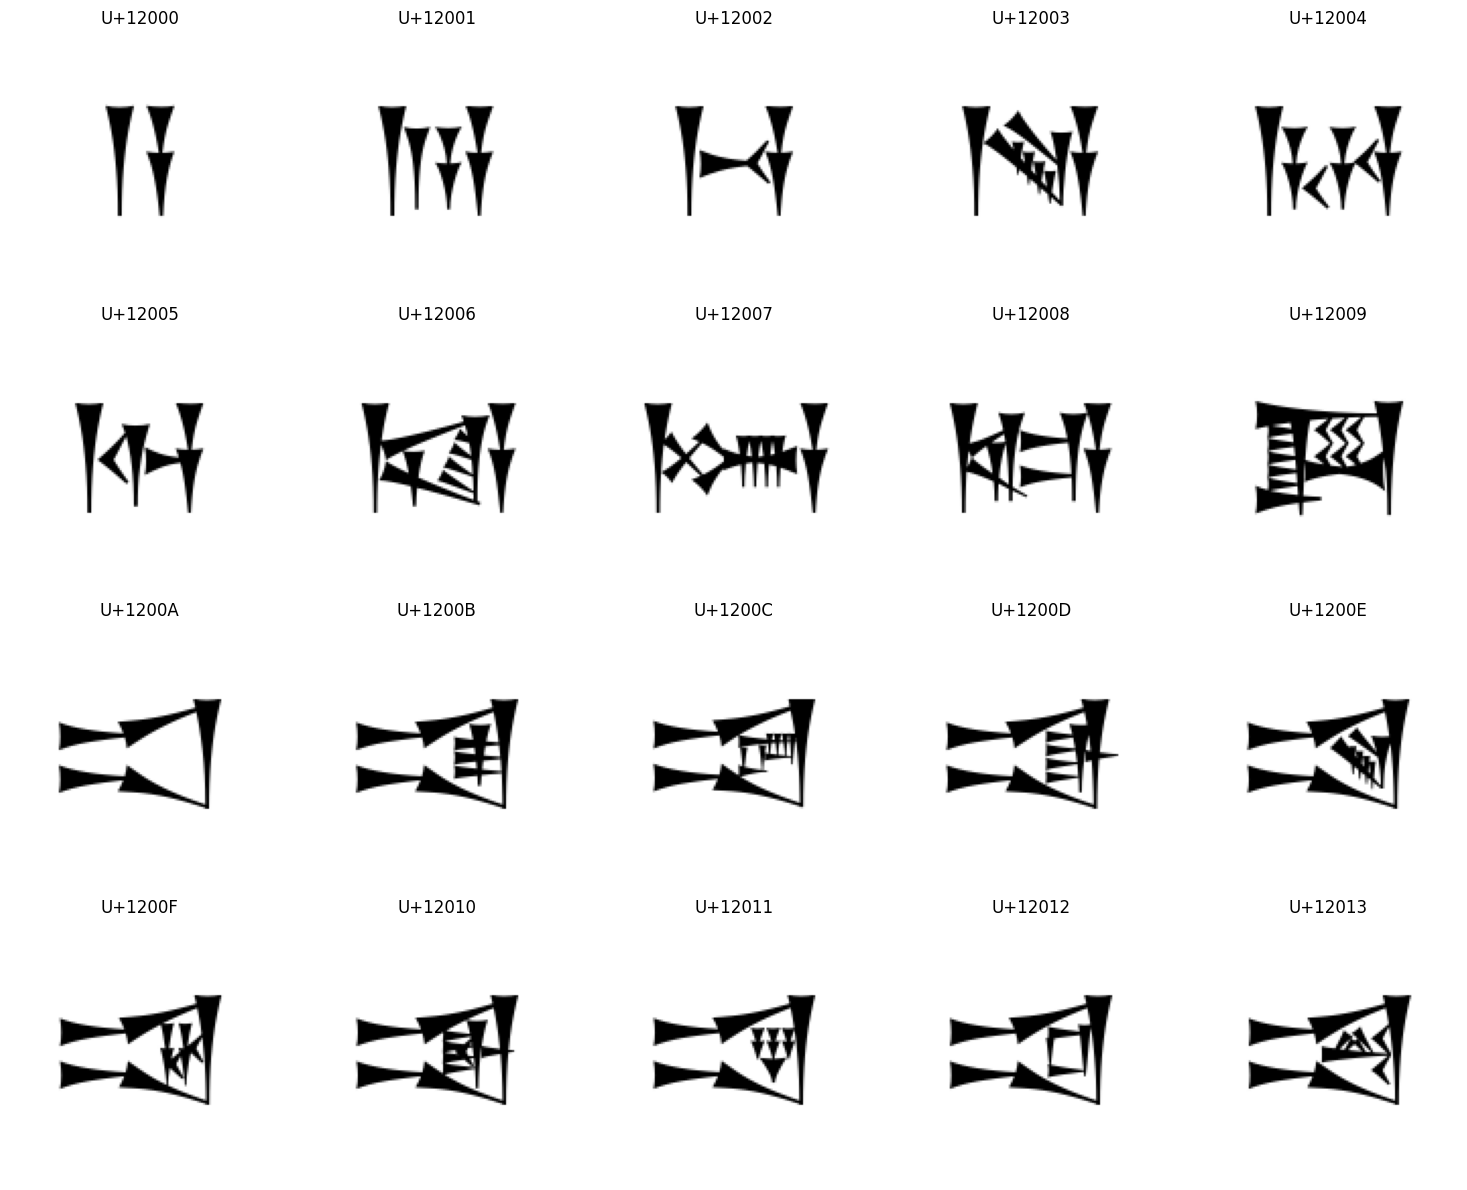

In [5]:
import numpy as np
import os
from PIL import Image, ImageDraw, ImageFont
import requests
import matplotlib.pyplot as plt
from fontTools.ttLib import TTFont

# Download Noto Sans Cuneiform font if not already downloaded
font_url = "https://github.com/googlefonts/noto-fonts/raw/main/unhinted/ttf/NotoSansCuneiform/NotoSansCuneiform-Regular.ttf"
font_path = "fonts/NotoSansCuneiform-Regular.ttf"

# Ensure fonts directory exists
os.makedirs("fonts", exist_ok=True)

# Check if the font file already exists
if not os.path.exists(font_path):
    response = requests.get(font_url)
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Font downloaded to {font_path}")
else:
    print(f"Font already exists at {font_path}")

# Create a directory to save the character images
output_dir = "glyph_images"
os.makedirs(output_dir, exist_ok=True)

# Function to create an image of a single character
def create_char_image(char, font_path, size=(128, 128), bg_color="white", fg_color="black"):
    # Create a new image with a white background
    img = Image.new('RGB', size, bg_color)
    draw = ImageDraw.Draw(img)
    
    # Load the font with a smaller size (50% of image width)
    font_size = int(size[0] * 0.5)
    font = ImageFont.truetype(font_path, font_size)
    
    # Get text dimensions using textbbox
    left, top, right, bottom = draw.textbbox((0, 0), char, font=font)
    text_width = right - left
    text_height = bottom - top
    
    # Calculate position to center the text (both horizontally and vertically)
    x_position = (size[0] - text_width) / 2 - left
    y_position = (size[1] - text_height) / 2 - top
    
    # Draw the text
    draw.text((x_position, y_position), char, font=font, fill=fg_color)
    
    return img

# Load the font file with fontTools to get actual glyphs
ttfont = TTFont(font_path)

# Extract all unicode characters supported by the font
cmap = ttfont.getBestCmap()
supported_chars = []

for code_point in cmap.keys():
    try:
        # Skip control characters and non-cuneiform ranges
        if code_point < 0x12000 or code_point > 0x123FF:
            continue
            
        char = chr(code_point)
        supported_chars.append((code_point, char))
    except (ValueError, UnicodeEncodeError):
        print(f"Could not convert code point {hex(code_point)} to character")

print(f"Found {len(supported_chars)} supported cuneiform characters in the font")

# Create and save images for each character
for i, (code_point, char) in enumerate(supported_chars):
    if i % 100 == 0:  # Show progress
        print(f"Creating image for character {i+1}/{len(supported_chars)}: U+{code_point:05X}")

    try:
        img = create_char_image(char, font_path)
        img_path = os.path.join(output_dir, f"cuneiform_U{code_point:05X}.png")
        img.save(img_path)
        
    except Exception as e:
        print(f"Error creating image for U+{code_point:05X}: {e}")

print(f"Created {len(supported_chars)} character images in {output_dir}")

# Display a sample of the characters
fig, axes = plt.subplots(4, 5, figsize=(15, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < min(20, len(supported_chars)):
        _, char = supported_chars[i]
        img = create_char_image(char, font_path)
        ax.imshow(np.array(img))
        ax.set_title(f"U+{ord(char):05X}")
        ax.axis('off')

plt.tight_layout()
plt.show()